# TM10007 Assignment

In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
# Libraries
import pandas as pd


from worcgist.load_data import load_data

In [8]:
# Load data
data = load_data()

data['label'] = data['label'].map({'non-GIST': 0, 'GIST': 1})

y = data['label']
x = data.drop(columns=['label'])

# Calculate basic statistics
n_samples = len(y)
n_features = len(x.columns)

n_missing = data.isna().sum().sum()
n_zero = (data == 0).sum().sum()

# Print basic statistics
print(f'The number of samples: {n_samples}')
print(f'The number of features: {n_features}')
print(f'The number of datapoints: {n_samples * n_features}')
print(f"The number of missing values: {n_missing}")
print(f"The number of zero values: {n_zero}")

data.info()
data.describe()
data.duplicated()

The number of samples: 246
The number of features: 493
The number of datapoints: 121278
The number of missing values: 0
The number of zero values: 6848
<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, GIST-001_0 to GIST-246_0
Columns: 494 entries, label to PREDICT_original_phasef_phasesym_entropy_WL3_N5
dtypes: float64(468), int64(26)
memory usage: 951.3+ KB


ID
GIST-001_0    False
GIST-002_0    False
GIST-003_0    False
GIST-004_0    False
GIST-005_0    False
              ...  
GIST-242_0    False
GIST-243_0    False
GIST-244_0    False
GIST-245_0    False
GIST-246_0    False
Length: 246, dtype: bool

## Pre-processing

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)  # or 50, or try multiple values
x_reduced_array = selector.fit_transform(x, y)
selected_feature_names = x.columns[selector.get_support()]
x_reduced = pd.DataFrame(x_reduced_array, columns=selected_feature_names)
#print(x_reduced.info())

NameError: name 'x' is not defined

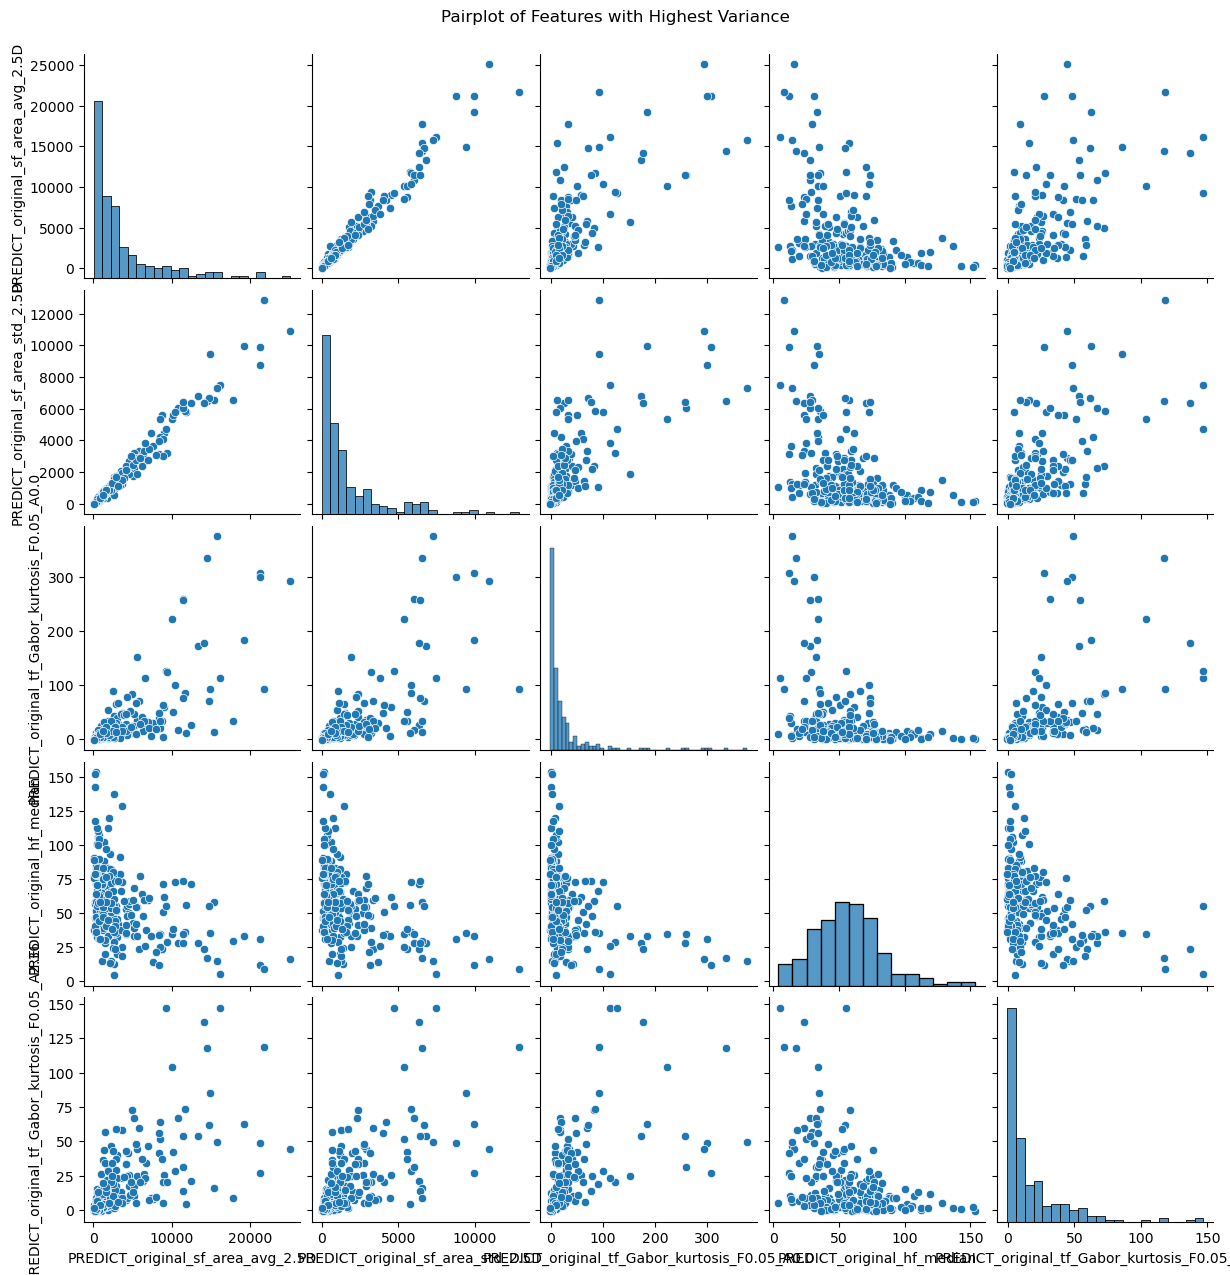

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate variance for each feature
feature_variances = x_reduced.var()

# Select the top 5 features with the highest variance
top_features = feature_variances.nlargest(5).index

# Create a seaborn pairplot for the top features with colors based on labels
sns.pairplot(x_reduced[top_features], hue=y.map({0: 'non-GIST', 1: 'GIST'}), palette="Set2", diag_kind="kde", height=2.5)
plt.suptitle("Pairplot of Features with Highest Variance", y=1.02)
plt.show()